# CAMELS-GB_v2

This dataset provides catchment boundaries, hydro-meteorological timeseries and landscape attributes for 671 catchments across Great Britain.

    – Includes: river flows, river levels, groundwater levels, precipitation, potential evapotranspiration and temperature time series
    – Daily hydro-meteorological timeseries from 1970 to 2022 (streamflow, PET, rainfall, temperature).
    – Hourly hydro-meteorological timeseries from 1990 to 2022 (rainfall, riverflow)
    – Catchment characteristics: land cover, hydrometry, human influences, location, topography, climate, hydrology, soils and hydrogeology
    – Hydrologic signatures: quantitative, statistical, or dynamical metrics which charac-terise a catchment’s physical behaviour
    
It is described in detailed at: https://essd.copernicus.org/preprints/essd-2025-608/

## Load the data
Explain usage of Pandas  
Might we actually need to load the data from a remote location?

In [1]:
import os
home_dir = "/scratch/hydro4/shared_data/uk_catchment_data/camels_gb_v2/"

In [2]:
import pandas as pd

In [3]:
topography = pd.read_csv(home_dir + "Catchment_Attributes/CAMELS_GB_v2_topographic_attributes.csv")
hydrologic_attributes = pd.read_csv(home_dir + "Catchment_Attributes/CAMELS_GB_v2_hydrologic_attributes.csv")
climatic_attributes = pd.read_csv(home_dir + "Catchment_Attributes/CAMELS_GB_v2_climatic_attributes.csv")

In [27]:
# nrfa = gpd.read_file("/scratch/hydro4/shared_data/uk_catchment_data/shapefile_boundaries/NRFACatchmentsAll-2024.shp")
# nrfa.plot(color = 'None', linewidth= 1)

## Understanding where the data covers

In [4]:
import matplotlib.pyplot as plt
import contextily as ctx

We can have a look at which variables are present using the head() method which returns the first 5 rows of the DataFrame.

This shows us that the topography dataframe contains the latitude and longitude of each gauge (where measurements for each catchment are made)

In [24]:
topography.head()

,gauge_id,gauge_name,gauge_lat,gauge_lon,gauge_easting,gauge_northing,gauge_elev,area,dpsbar,elev_mean,elev_min,elev_10,elev_50,elev_90,elev_max
0,10002,Ugie at Inverugie,57.53,-1.83,410113,848516,8.5,325.72,42.3,87,9.5,38.6,84.1,140.1,233.7
1,10003,Ythan at Ellon,57.36,-2.09,394684,830370,3.8,532.29,55.1,108,3.5,54.1,106.1,160.8,380.4
2,1001,Wick at Tarroul,58.48,-3.27,326202,954915,13.0,158.18,29.9,80,12.9,30.6,78.8,135.2,241.4
3,101002,Medina at Shide,50.69,-1.29,450359,88113,10.4,30.61,80.0,60,9.4,26.8,56.8,98.0,193.2
4,101005,Eastern Yar at Budbridge,50.65,-1.25,453120,83520,17.2,24.31,87.0,92,17.2,32.9,84.0,157.2,234.6


### Mapping gauge locations

We can use this information to plot a map showing the gauge locations.  

1️⃣ We must convert the tabular latitude–longitude data into a spatial object. 

This uses the Point() function from the shapely library to turn coordinate pairs into spatial point objects
and the geopandas library 

2️⃣ Converting a DataFrame to a GeoDataFrame

This uses the geopandas library. A GeoDataFrame looks like a normal pandas dataframe but has a special geometry column which stores the location as a georeferenced object with a coordinate reference system (crs). 

In [ ]:
from shapely.geometry import Point
import geopandas as gpd

In [35]:
# Get just the gauge location information
gauge_locs = topography[['gauge_id', 'gauge_name', 'gauge_lat', 'gauge_lon']]
# Construct the geometry from the latitude and longitude using Shapely
geometry = [Point(xy) for xy in zip(topography.gauge_lon, topography.gauge_lat)]
# Create the geodataframe
# gauge_locs = topography.drop(['gauge_lon', 'gauge_lat'], axis=1)
gauge_locs_gdf = gpd.GeoDataFrame(gauge_locs, crs="EPSG:4326", geometry=geometry)
gauge_locs_gdf.head()

,gauge_id,gauge_name,gauge_lat,gauge_lon,geometry
0,10002,Ugie at Inverugie,57.53,-1.83,POINT (-1.83 57.53)
1,10003,Ythan at Ellon,57.36,-2.09,POINT (-2.09 57.36)
2,1001,Wick at Tarroul,58.48,-3.27,POINT (-3.27 58.48)
3,101002,Medina at Shide,50.69,-1.29,POINT (-1.29 50.69)
4,101005,Eastern Yar at Budbridge,50.65,-1.25,POINT (-1.25 50.65)


Geopandas allows us to easily plot this information on a map, allowing us to see the gauge locations:

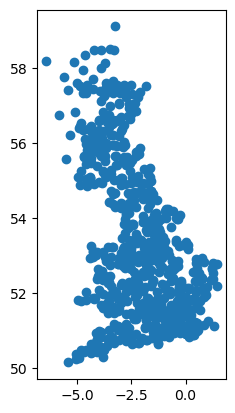

In [42]:
gauge_locs_gdf.plot();

In this dataset, the gauge density is so high that we can almost see the outline of the UK. To better inspect their spatial distribution, we can plot the gauges on a basemap.

To do this, we need to reproject the data to EPSG:3857 (Web Mercator). This projection is required because most web map tiles, like those from CartoDB or OpenStreetMap, use 3857, so the gauges and the basemap align correctly.

In this example, we create a matplotlib figure and axes (fig, ax), which lets us plot both the gauge points and the basemap on the same canvas, making it easier to visualize and explore the spatial layout.

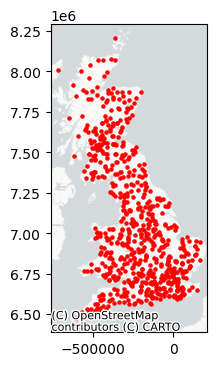

In [45]:
# Reproject the data to Web Mercator (EPSG:3857) so it aligns with web map tiles
gauge_locs_3857 = gauge_locs_gdf.to_crs(epsg=3857)
# nrfa_3857 = nrfa.to_crs(epsg=3857)

fig,ax=plt.subplots(figsize=(4,4))
gauge_locs_3857.plot(ax=ax, markersize=5, color="red")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# nrfa_3857.plot(ax=ax, color = 'None', linewidth= 0.5)

In [48]:
# import folium

# # Make sure we use WGS84 (EPSG:4326)
# gdf = gauge_locs_gdf.to_crs(epsg=4326)

# # Create base map centred on mean location
# m = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()],zoom_start=6,tiles="CartoDB positron")

# # Add gauge points
# for _, row in gdf.iterrows():
#     folium.CircleMarker(location=[row.geometry.y, row.geometry.x], radius=3, color="red",fill=True,fill_opacity=0.8).add_to(m)

# folium.GeoJson(nrfa,style_function=lambda x: {'fillColor': 'transparent','color': 'blue','weight': 0.5 }).add_to(m)

# m

# Understanding the hydrological signatures

The hydrologic signatures characterise streamflow dynamics over the following timescales:
- long-term (i.e. mean flow, runoff ratio, streamflow elasticity, baseflow index)
- seasonal (i.e. the half low date)
- short-term (i.e. high and low flow percentiles, frequency and duration of high and low streamflow events) 

In [6]:
hydrologic_attributes.head()

,gauge_id,q_mean,runoff_ratio,stream_elas,slope_fdc,baseflow_index,baseflow_index_ceh,hfd_mean,Q5,Q95,high_q_freq,high_q_dur,low_q_freq,low_q_dur,zero_q_freq
0,10002,1.31,0.56,1.19,1.94,0.66,0.63,130.50,0.32,3.50,2.15,1.32,6.41,7.52,0.0
1,10003,1.32,0.55,1.37,1.95,0.72,0.73,136.53,0.32,3.36,0.99,1.39,8.64,9.71,0.0
2,1001,1.62,0.61,1.15,4.09,0.49,0.39,108.78,0.08,5.48,7.36,1.52,103.48,11.74,0.0
3,101002,0.90,0.38,1.26,1.49,0.68,0.66,135.31,0.25,2.47,3.48,1.22,3.46,5.00,0.0
4,101005,0.79,0.35,1.35,1.51,0.63,0.59,136.22,0.26,2.27,5.89,1.38,0.35,2.80,0.0


These variables are described in Table 2 in https://essd.copernicus.org/articles/12/2459/2020/#&gid=1&pid=1: 

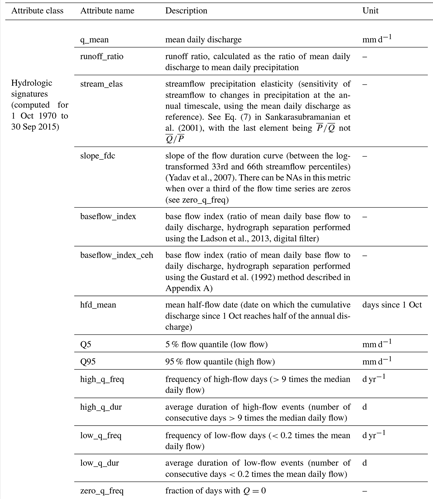

Can look at the range of values for one of the variables 

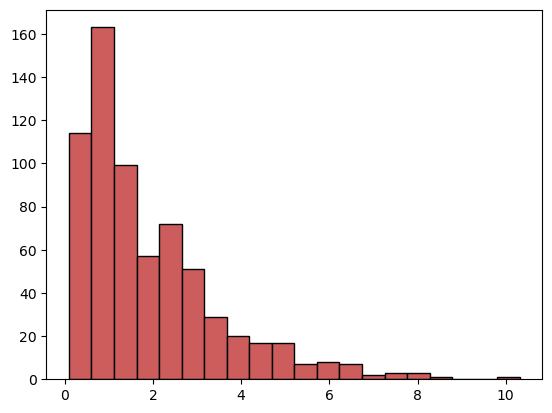

In [23]:
plt.hist(hydrologic_attributes['q_mean'], bins =20, color= 'indianred', edgecolor='black');

We might also want to understand whether there is spatial variation in the variable values.  

To look at this we need to join the hydrologic signature data to spatial data

In [4]:
hydrologic_attributes_with_locs = pd.merge(gauge_locs_gdf, hydrologic_attributes)

In [5]:
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
uk = world[world["ADMIN"] == "United Kingdom"]
# Make sure CRS matches gauges
uk = uk.to_crs(gauge_locs_gdf.crs)

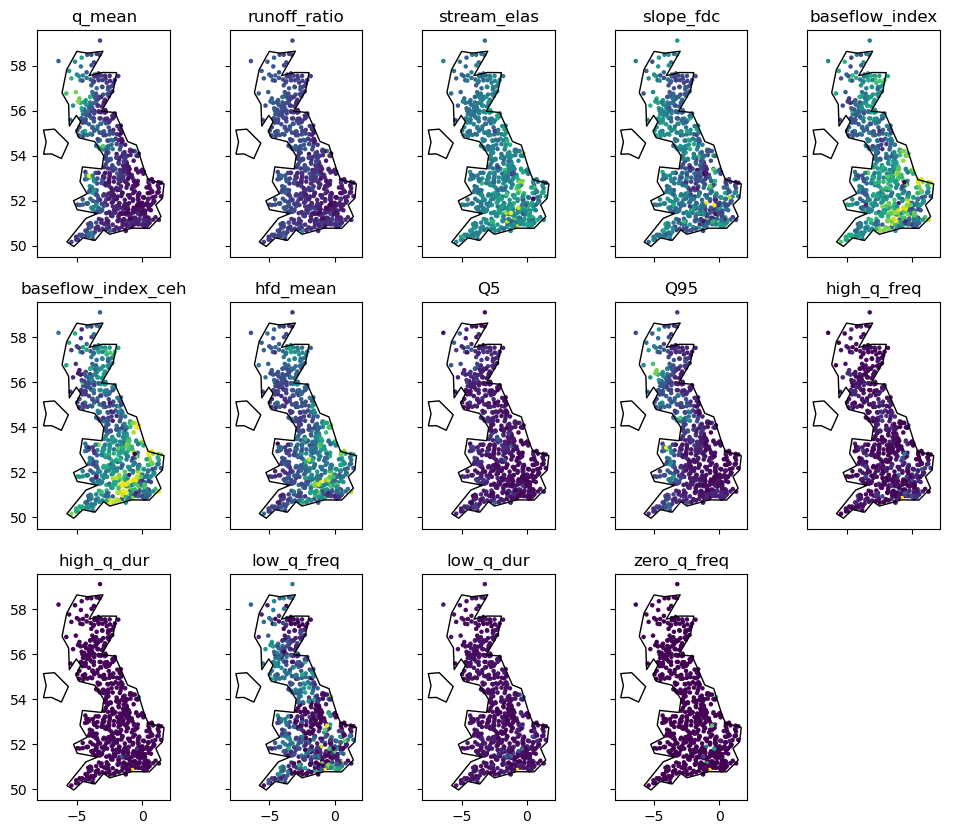

In [12]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(12,7), sharex=True, sharey=True) #wide, tall
axs=axs.flatten()
for ax_num, col in enumerate(hydrologic_attributes_with_locs.columns[3:]):
    uk.boundary.plot(ax=axs[ax_num], color="black", linewidth=1)
    hydrologic_attributes_with_locs.plot(ax=axs[ax_num],column=col,cmap="viridis", markersize=5, legend=False)
    axs[ax_num].set_title(col)
for ax in axs[len(hydrologic_attributes_with_locs.columns[3:]):]:
    ax.axis('off')

<Axes: >

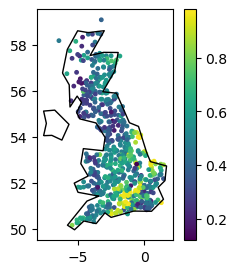

In [16]:
fig, ax = plt.subplots(figsize=(3,3))
uk.boundary.plot(ax=ax, color="black", linewidth=1)
hydrologic_attributes_with_locs.plot(ax=ax,column="baseflow_index_ceh",cmap="viridis",  markersize=6, legend=True)